In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time


In [2]:
A = np.array([[0,1,2,3,1,2,3,4],
              [1,0,1,2,2,1,2,3],
              [2,1,0,1,3,2,1,2],
              [3,2,1,0,4,3,2,1]])

RHS  = np.array([10,15,6,8])

Utility  = np.array([1,5,2,4,1,3,4,3])

row, col = A.shape

print(row)
print(col)

print(A)
print (Utility)



4
8
[[0 1 2 3 1 2 3 4]
 [1 0 1 2 2 1 2 3]
 [2 1 0 1 3 2 1 2]
 [3 2 1 0 4 3 2 1]]
[1 5 2 4 1 3 4 3]


In [3]:
# Define a Objective function
def of(c,x):
    return sum(c*x)

# Verify the feasibility of the solution
def feasibility(a,b,x):
    Feasible = True
    for i in range(row):
        if sum(a[i]*x) > b[i]:
            Feasible = False
    return Feasible


def neigh_changeOne(x):
    print("input: \t", x)
    xx = x.copy() #copy the solution to preserve the original
    #[0,0,0,0,0,0,0,0]
    bestX = x.copy()
    bestOF = of(bestX,Utility)

    for i in range(col):
        xx[i] = (1-xx[i])
        if printAll: print("ChangeOne(",i, "): ", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
        if feasibility(A,RHS,xx):
            Obj = of(xx,Utility)
            if(Obj > bestOF):
                bestX = xx.copy()
                bestOF = Obj
    print("*ChangeOne(",i, "):", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    
    return bestX, bestOF

def neigh_changeOne2(x):

    #copy the solution to preserve the original
    xx = x.copy() 
    bestX = x.copy() 
    #load best objective function
    bestOF = of(bestX,Utility) 
    print("input2: \t", x," and best: \t", bestOF)
    for i in range(col):
        
        #change current binary i
        xx[i] = (1-xx[i]) 
        if printAll: print("ChangeOne2(",i, "): ", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
        
        #verify feasibility
        if feasibility(A,RHS,xx):
            Obj = of(xx,Utility)
            
            #If current objective function is best of than previos then the current is changed
            if(Obj > bestOF):
                bestX = xx.copy()
                bestOF = Obj
                break
            
        
    print("*ChangeOne2(",i, "):", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    return bestX, bestOF


Best Improve Strategy
input: 	 [0 0 0 0 0 0 0 0]
ChangeOne( 0 ):  [1 0 0 0 0 0 0 0] 	OF:  1 	Feasible:  True
ChangeOne( 1 ):  [1 1 0 0 0 0 0 0] 	OF:  6 	Feasible:  True
ChangeOne( 2 ):  [1 1 1 0 0 0 0 0] 	OF:  8 	Feasible:  True
ChangeOne( 3 ):  [1 1 1 1 0 0 0 0] 	OF:  12 	Feasible:  True
ChangeOne( 4 ):  [1 1 1 1 1 0 0 0] 	OF:  13 	Feasible:  False
ChangeOne( 5 ):  [1 1 1 1 1 1 0 0] 	OF:  16 	Feasible:  False
ChangeOne( 6 ):  [1 1 1 1 1 1 1 0] 	OF:  20 	Feasible:  False
ChangeOne( 7 ):  [1 1 1 1 1 1 1 1] 	OF:  23 	Feasible:  False
*ChangeOne( 7 ): [1 1 1 1 1 1 1 1] 	OF:  23 	Feasible:  False
input: 	 [1 1 1 1 0 0 0 0]
ChangeOne( 0 ):  [0 1 1 1 0 0 0 0] 	OF:  11 	Feasible:  True
ChangeOne( 1 ):  [0 0 1 1 0 0 0 0] 	OF:  6 	Feasible:  True
ChangeOne( 2 ):  [0 0 0 1 0 0 0 0] 	OF:  4 	Feasible:  True
ChangeOne( 3 ):  [0 0 0 0 0 0 0 0] 	OF:  0 	Feasible:  True
ChangeOne( 4 ):  [0 0 0 0 1 0 0 0] 	OF:  1 	Feasible:  True
ChangeOne( 5 ):  [0 0 0 0 1 1 0 0] 	OF:  4 	Feasible:  True
ChangeOne( 6

Text(0.5, 0, '# Round')

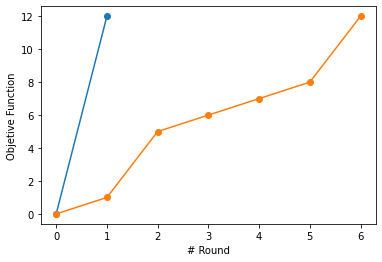

In [4]:
X0 = np.array([0,0,0,0,0,0,0,0])
bestX = X0.copy()
bestOF_ant = 0 

printAll = True

history = [0]
history2 = [0]

improvement = True

t1_start = process_time() 
print("Best Improve Strategy")
while improvement:
    bestX, bestOF = neigh_changeOne(bestX)
    if bestOF > bestOF_ant:
        bestOF_ant = bestOF
        history.append(bestOF)
    else: 
        improvement = False

print("First Improve Stragegy")        
improvement = True
bestX = X0.copy()
bestOF_ant = 0 
while improvement:
    bestX, bestOF = neigh_changeOne2(bestX)
    if bestOF > bestOF_ant:
        bestOF_ant = bestOF
        history2.append(bestOF)
    else: 
        improvement = False
        
# Stop the stopwatch / counter
t1_stop = process_time()


print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 

plt.plot(history, "-o")
plt.plot(history2, "-o")

plt.ylabel('Objetive Function')
plt.xlabel('# Round')
#plt.annotate('local max', xy=(30, 16), xytext=(15, 16),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

